In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../exercises/athlete_events.csv')

Notes:
 * recap about canlendars and time and what you actully need to know about it all
 * 

## COMP 3122 - Artificial Intelligence with Python
__Week 5 lecture__

### [github.com/kamrik/ML1](https://github.com/kamrik/ML1)

### [slido.com/COMP3122](http://slido.com/COMP3122)

## Recap of previous material

## Calendars
 * I forgot to metion why Pope Gregory XIII decided to reform the calendar   
 * The Equinox was slowly drifting away from its' nominal date - about 3/4 of a day per century
 * Common people probably didn't care much about this, but the church was quite obsessed with precision when it comes to computing the date of the Easter
 * The new rules for leap years were designed to prevent further drift and the 10 day jump to deal with the already accumulated drift

## Calendars - what you need to know
 - Our modern calendar is called Gregorian
 - Most countries used some variant of the Julian calendar before the Gregorian and switched gradually over a long period of several centuries - therefore the same day could have different "names" in different places.

## Time
 * Our wall clock is **not monotonic** - it can go back when switching to winter time.
   * This can result in unexpected negative time intervals
   * We switch to winter clock on Sunday, November 4 this year
 


## Unix time - single number, monotonic
 * Number of seconds elapsed since 1970-01-01 00:00:00 UTC (approximately, up to leap seconds)
 * Also known as POSIX time or UNIX Epoch time - [see Wikipedia](https://en.wikipedia.org/wiki/Unix_time)

In [6]:
import time
time.time()

1538418707.231928

## When in doubt, use UTC
 * And [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) to represent it as text

In [23]:
pd.Timestamp.utcnow()


Timestamp('2018-10-01 20:25:23.916637+0000', tz='UTC')

## Datetime in Pandas
 * `pd.to_datetime()`
 * `pd.to_timedelta()`
 * `pd.reads_csv(..., parse_dates=['Column1', 'Column2'])`
 * Good detailed description of datetime in Pandas in [book section 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)


In [24]:
t = pd.to_datetime('14:05')
t

Timestamp('2018-10-01 14:05:00')

In [21]:
# lots of useful props and fucntions...
t.is_leap_year

False

## More info about datetime in Pandas
 * Examples of using datetime - Video 25 of the video series
 * Good detailed description of datetime in Pandas in [book section 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

## Seaborn plotting library - overview and concepts

In [72]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Plotting - colors & style

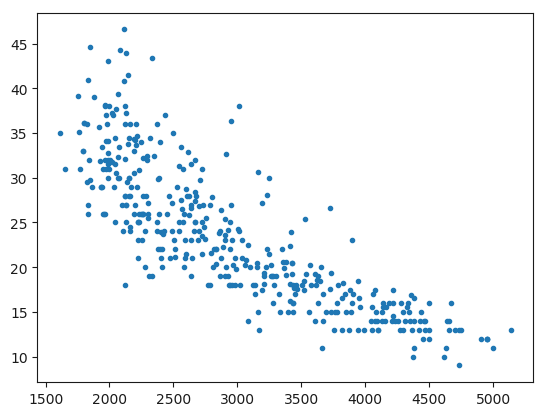

In [101]:
plt.style.use('default')
plt.plot(df.weight, df.mpg, '.')

In [84]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


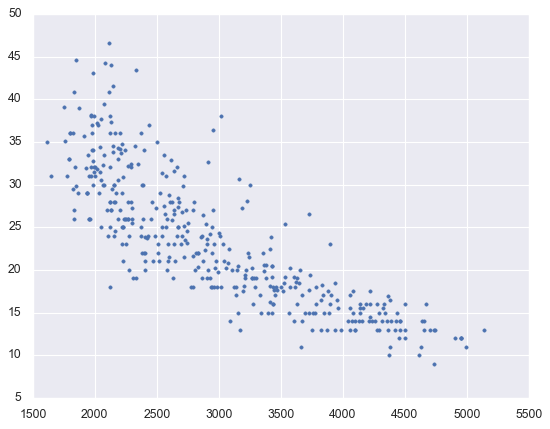

In [98]:
sns.set()
plt.plot(df.weight, df.mpg, '.')

## Seaborn plotting functions
 - Note, Seaborn changed significantly with the latest version (9.0)

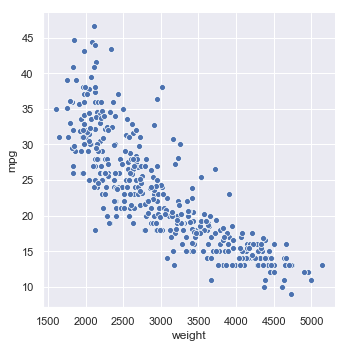

In [68]:
sns.relplot(x='weight', y='mpg', data=df)

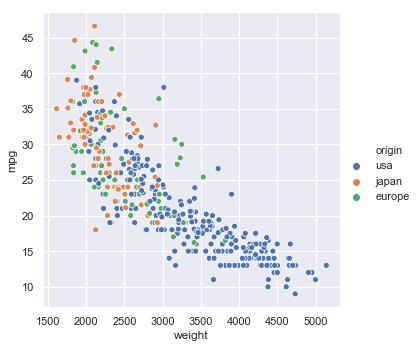

In [69]:
sns.relplot(x='weight', y='mpg', hue='origin', data=df)

## df.plot() is similar to Seaborn functions
 - The dataset is all there, we assign reoles to columns
 - df.plot() takes the `kind` parameter which can completely change whe the plot is. Aslo used in Seaborn.
   - `df.plot(kind='bar' ...)`
   - `df.plot(kind='line' ...)`

## sns.jointplot() and sns.pairplot()

C:\progs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


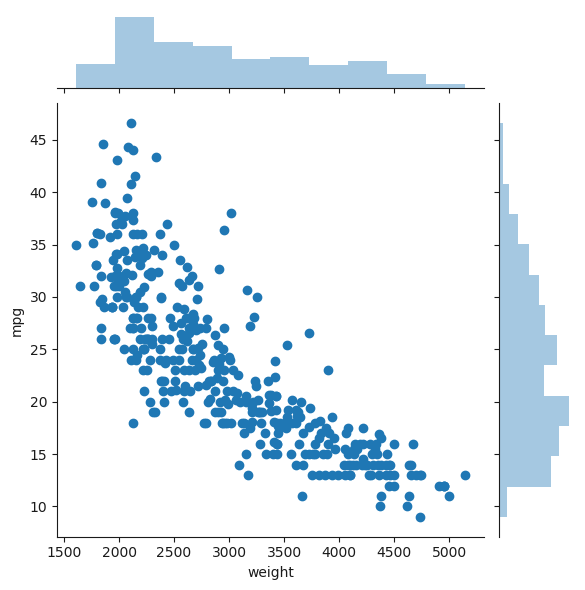

In [102]:
sns.jointplot('weight', 'mpg', df)

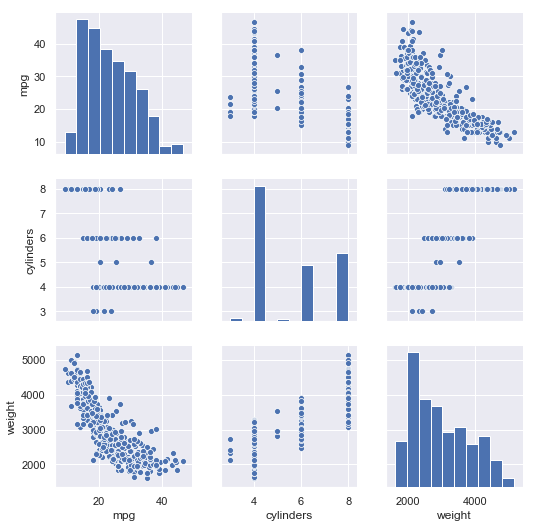

In [71]:
mpg2 = df[['mpg', 'cylinders', 'weight']]
sns.pairplot(mpg2.dropna())

## Seaborn summary
 - Instead of passing in data for x and data for y, pass the whole dataset and then tell the names of the columns for x, y and occasionaly other roles like color.
 - Very useful functions - sns.pairplot() and sns.jointplot()

## Histograms and distributions

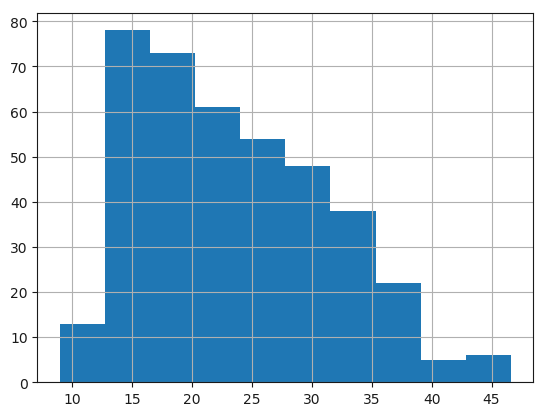

In [140]:
df.mpg.hist(bins=10)

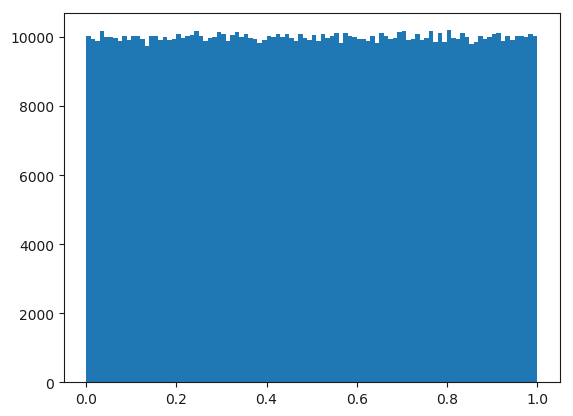

In [166]:
b = plt.hist(np.random.rand(1000000), bins=100)

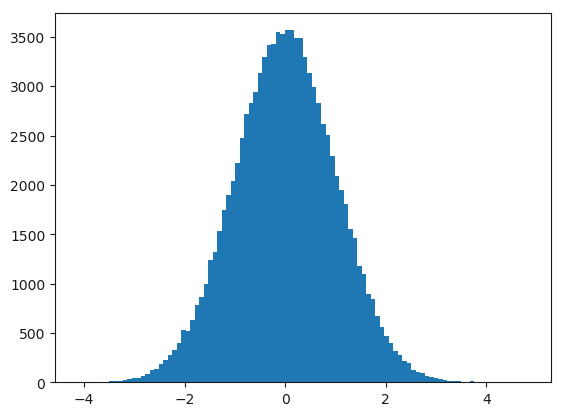

In [160]:
b = plt.hist(np.random.randn(100000), bins=100)


## What's a distribution?

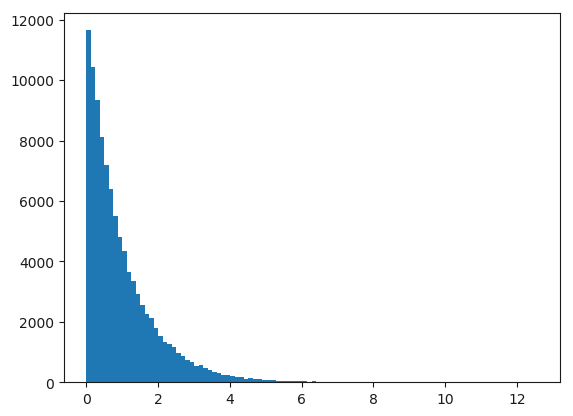

In [139]:
b = plt.hist(np.random.exponential(1, size=100000), bins=100)